In [1]:
import gc
import os
import glob
import zipfile
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

import cv2
import PIL
from PIL import ImageOps, ImageFilter, ImageDraw

In [2]:
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

# import plaidml.keras
# plaidml.keras.install_backend()

# import keras
import tensorflow as tf

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/

In [3]:
# keras.backend.backend()

In [4]:
DATA_PATH = '/Users/Il-hyeon/Documents/Data/splitlabel/'
IMG_PATH = '/Users/Il-hyeon/Documents/Data/467case_cut/'
os.listdir(DATA_PATH)

['뿌리-부재2.xlsx',
 '위치-나무-정중앙.xlsx',
 '크기-나무-크다.xlsx',
 'train_위치-나무-정중앙.xlsx',
 'test_가지-부재.xlsx',
 '수관-공 모양.xlsx',
 'train_위치-나무-아래.xlsx',
 '기둥-옹이구멍 안 동물.xlsx',
 '.DS_Store',
 'test_뿌리-부재1.xlsx',
 '위치-나무-위.xlsx',
 'train_뿌리-부재2.xlsx',
 'train_가지-부재.xlsx',
 'train_수관-공 모양.xlsx',
 '가지-부재.xlsx',
 'test_절단-나무-오른쪽.xlsx',
 '절단-나무-위.xlsx',
 'train_가지-옆으로 벌어짐.xlsx',
 'test_위치-나무-아래.xlsx',
 'test_기둥-상처, 옹이구멍.xlsx',
 'train_기둥-상처, 옹이구멍.xlsx',
 'train_크기-나무-크다.xlsx',
 'test_절단-나무-위.xlsx',
 'train_위치-나무-위.xlsx',
 '위치-나무-아래.xlsx',
 'test_수관-공 모양.xlsx',
 '가지-아래로 늘어진 가지.xlsx',
 'test_기둥-옹이구멍 안 동물.xlsx',
 'train_절단-나무-오른쪽.xlsx',
 'test_가지-옆으로 벌어짐.xlsx',
 'test_크기-나무-크다.xlsx',
 'train_기둥-옹이구멍 안 동물.xlsx',
 'train_절단-나무-위.xlsx',
 'train_뿌리-부재1.xlsx',
 '기둥-상처, 옹이구멍.xlsx',
 '가지-옆으로 벌어짐.xlsx',
 'test_가지-아래로 늘어진 가지.xlsx',
 'test_위치-나무-정중앙.xlsx',
 'test_뿌리-부재2.xlsx',
 'train_가지-아래로 늘어진 가지.xlsx',
 '뿌리-부재1.xlsx',
 '절단-나무-오른쪽.xlsx',
 'test_위치-나무-위.xlsx']

In [5]:
tree = ['크기-나무-크다',
           '위치-나무-정중앙',
            '위치-나무-아래',
            '위치-나무-위',
            '절단-나무-위',
            '절단-나무-오른쪽',
            '가지-아래로 늘어진 가지',
            '뿌리-부재1',
            '수관-공 모양',
            '기둥-옹이구멍 안 동물',
            '가지-부재',
            '뿌리-부재2',
            '가지-옆으로 벌어짐',
            '기둥-상처, 옹이구멍'
            ]

In [6]:
# TRAIN_CROP_PATH = '/Users/Il-hyeon/Documents/Data/train_crop'
TRAIN_IMG_PATH = os.path.join(IMG_PATH, 'tree')

df_train = []
df_test = []
for excel_name in tree:
    df_train.append(pd.read_excel(os.path.join(DATA_PATH, 'train_' + excel_name + '.xlsx')))
    df_train[tree.index(excel_name)]['data'] = df_train[tree.index(excel_name)].data.apply(lambda x: f'{x:0>4}')
    df_test.append(pd.read_excel(os.path.join(DATA_PATH, 'test_' + excel_name + '.xlsx')))
    df_test[tree.index(excel_name)]['data'] = df_test[tree.index(excel_name)].data.apply(lambda x: f'{x:0>4}')

In [7]:
for i in range(len(tree)):
    print(df_train[i].head())
    print(df_test[i].head())

   Unnamed: 0        data  크기-나무-크다
0         174  0200_T.jpg         1
1         272  0317_T.jpg         1
2         170  0196_T.jpg         1
3           8  0009_T.jpg         1
4         214  0245_T.jpg         1
   Unnamed: 0        data  크기-나무-크다
0         433  0502_T.jpg         1
1          71  0072_T.jpg         0
2           7  0008_T.jpg         1
3         352  0421_T.jpg         1
4         444  0513_T.jpg         1
   Unnamed: 0        data  위치-나무-정중앙
0         220  0252_T.jpg          0
1         363  0432_T.jpg          0
2         394  0463_T.jpg          0
3         142  0159_T.jpg          0
4          41  0042_T.jpg          0
   Unnamed: 0        data  위치-나무-정중앙
0         442  0511_T.jpg          0
1         324  0393_T.jpg          0
2         159  0182_T.jpg          0
3         269  0312_T.jpg          0
4         101  0102_T.jpg          0
   Unnamed: 0        data  위치-나무-아래
0         253  0292_T.jpg         0
1         375  0444_T.jpg         1
2          69  0

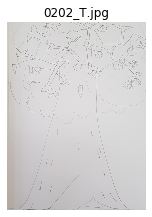

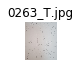

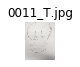

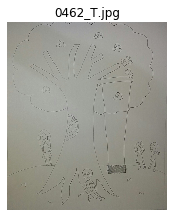

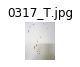

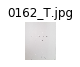

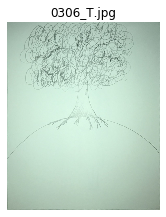

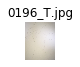

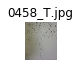

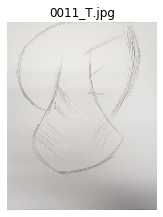

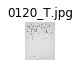

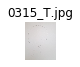

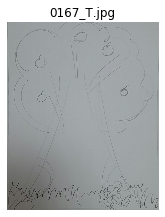

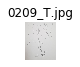

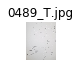

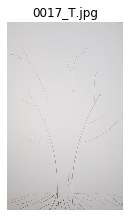

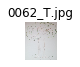

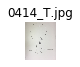

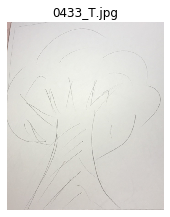

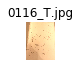

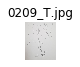

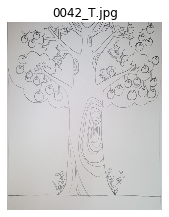

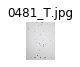

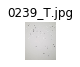

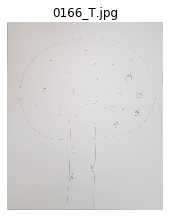

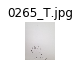

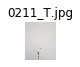

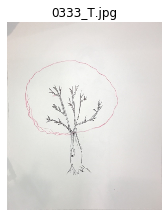

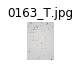

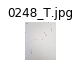

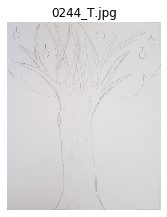

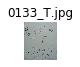

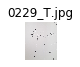

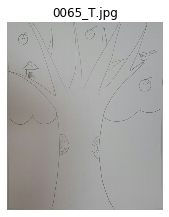

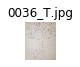

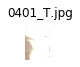

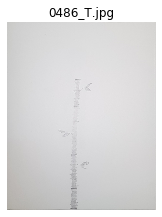

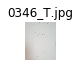

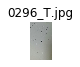

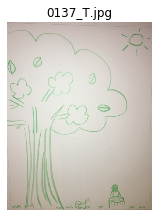

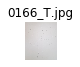

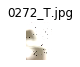

In [8]:
for i in range(len(df_train)):
    tmp_img = df_train[i]['data'][100:103]
    plt.figure(figsize=(12, 20))
    
    for num, f_name in enumerate(tmp_img):
        img = PIL.Image.open(os.path.join(TRAIN_IMG_PATH, f_name))
        plt.subplot(5, 2, 2*num + 1)
        plt.title(f_name)
        plt.imshow(img)
        plt.axis('off')
        plt.show()

In [9]:
from sklearn.model_selection import train_test_split

X_train = []
X_val = []

for i, data in enumerate(tree):
    
    df_train[i][data] = df_train[i][data].astype('str')
    y = df_train[i][data]
    df_train[i] = df_train[i][['data', data]]
    df_test[i] = df_test[i][['data']]
    
    its = np.arange(df_train[i].shape[0])
    train_idx, val_idx = train_test_split(its, test_size = 0.2, random_state = 42, stratify=y)
    
    X_train.append(df_train[i].iloc[train_idx, :])
    X_val.append(df_train[i].iloc[val_idx, :])
    
    print(data)
    print(X_train[i].shape)
    print(X_val[i].shape)
    print(df_train[i].shape)
    print('='*20)

크기-나무-크다
(298, 2)
(75, 2)
(373, 2)
위치-나무-정중앙
(298, 2)
(75, 2)
(373, 2)
위치-나무-아래
(298, 2)
(75, 2)
(373, 2)
위치-나무-위
(298, 2)
(75, 2)
(373, 2)
절단-나무-위
(298, 2)
(75, 2)
(373, 2)
절단-나무-오른쪽
(298, 2)
(75, 2)
(373, 2)
가지-아래로 늘어진 가지
(298, 2)
(75, 2)
(373, 2)
뿌리-부재1
(298, 2)
(75, 2)
(373, 2)
수관-공 모양
(298, 2)
(75, 2)
(373, 2)
기둥-옹이구멍 안 동물
(298, 2)
(75, 2)
(373, 2)
가지-부재
(298, 2)
(75, 2)
(373, 2)
뿌리-부재2
(298, 2)
(75, 2)
(373, 2)
가지-옆으로 벌어짐
(298, 2)
(75, 2)
(373, 2)
기둥-상처, 옹이구멍
(298, 2)
(75, 2)
(373, 2)


In [10]:
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [11]:
epochs = 20
batch_size = 32
img_size = (224, 224)
train_datagen = ImageDataGenerator(
    horizontal_flip = False, 
    vertical_flip = False, 
    preprocessing_function = preprocess_input
)

val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = []
validation_generator = []
test_generator = []

nb_train_samples = []
nb_validation_samples = []
nb_test_samples = []

for i, num in enumerate(tree):
        nb_train_samples.append(len(X_train[i]))
        nb_validation_samples.append(len(X_val[i]))
        nb_test_samples.append(len(df_train[i]))
        
        train_generator.append(train_datagen.flow_from_dataframe(
            dataframe=X_train[i],
            directory=TRAIN_IMG_PATH,
            x_col = 'data',
            y_col = tree[i],
            target_size = img_size,
            color_mode='rgb',
            class_mode='categorical',
            batch_size=batch_size,
            seed=42
        ))
        
        validation_generator.append(val_datagen.flow_from_dataframe(
            dataframe=X_val[i],
            directory=TRAIN_IMG_PATH,
            x_col='data',
            y_col=tree[i],
            target_size=img_size,
            color_mode='rgb',
            class_mode='categorical',
            batch_size=batch_size,
            shuffle=False
        ))
        
        test_generator.append(test_datagen.flow_from_dataframe(
            dataframe=df_test[i],
            directory=TRAIN_IMG_PATH,
            x_col='data',
            y_col=None,
            target_size = img_size,
            color_mode='rgb',
            class_mode=None,
            batch_size=batch_size,
            shuffle=False
        ))

Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 validated image filenames belonging to 2 classes.
Found 94 validated image filenames.
Found 298 validated image filenames belonging to 2 classes.
Found 75 v

In [12]:
from tensorflow.keras.applications.mobilenet import MobileNet, preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, GlobalAveragePooling2D

In [13]:
def MakeMobileModel():
    mobileNetModel = MobileNet(weights='imagenet', include_top=False)

    model = Sequential()
    model.add(mobileNetModel)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(2, activation='softmax', kernel_initializer='he_normal'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
    return model
model = MakeMobileModel()
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/keras_applications/mobilenet.py:207: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  warnings.warn('`input_shape` is undefined or non-square, '


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Model)   (None, None, None, 1024)  3228864   
_________________________________________________________________
global_average_pooling2d (Gl (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 2050      
Total params: 3,230,914
Trainable params: 3,209,026
Non-trainable params: 21,888
_________________________________________________________________


In [14]:
from sklearn.metrics import f1_score

def micro_f1(y_true, y_pred):
    return f1_score(y_true, y_pred, average='micro')

In [15]:
def get_steps(num_samples, batch_size):
    if (num_samples % batch_size) > 0:
        return (num_samples // batch_size) + 1
    else:
        return num_samples // batch_size

In [16]:
# keras.backend.backend()

In [17]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

history = []

for i in range(3, 4):
    model = MakeMobileModel()
    filepath = tree[i] + '_mobile_model_{val_acc:.2f}_{val_loss:.4f}.h5'
    
    ckpt = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True)
#     es = EarlyStopping(monitor='val_acc', min_delta=0, patience=3, verbose=1, mode='auto')
    
    callbackList = [ckpt]
    
    history.append(model.fit_generator(
        train_generator[i],
        steps_per_epoch = get_steps(nb_train_samples[i], batch_size),
        epochs=epochs,
        validation_data = validation_generator[i],
        validation_steps = get_steps(nb_validation_samples[i], batch_size),
        callbacks = callbackList
    ))
    gc.collect()

Epoch 1/20
 9/10 [==========================>...] - ETA: 5s - loss: 0.9311 - acc: 0.6729 
Epoch 00001: val_acc improved from -inf to 0.73333, saving model to 위치-나무-위_mobile_model_0.73_1.6244.h5
10/10 [==============================] - 56s 6s/step - loss: 0.8851 - acc: 0.6846 - val_loss: 1.6244 - val_acc: 0.7333
Epoch 2/20
 9/10 [==========================>...] - ETA: 4s - loss: 0.3711 - acc: 0.8889
Epoch 00002: val_acc did not improve from 0.73333
10/10 [==============================] - 46s 5s/step - loss: 0.3530 - acc: 0.8859 - val_loss: 0.5817 - val_acc: 0.7200
Epoch 3/20
 9/10 [==========================>...] - ETA: 4s - loss: 0.2157 - acc: 0.9173
Epoch 00003: val_acc improved from 0.73333 to 0.74667, saving model to 위치-나무-위_mobile_model_0.75_1.5481.h5
10/10 [==============================] - 47s 5s/step - loss: 0.2291 - acc: 0.9060 - val_loss: 1.5481 - val_acc: 0.7467
Epoch 4/20
 9/10 [==========================>...] - ETA: 4s - loss: 0.1410 - acc: 0.9586
Epoch 00004: val_acc impr

In [18]:
print(tree[3])

위치-나무-위


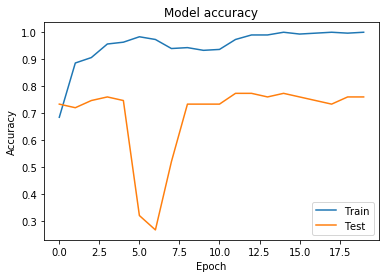

In [21]:
plt.plot(history[0].history['acc'])
plt.plot(history[0].history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

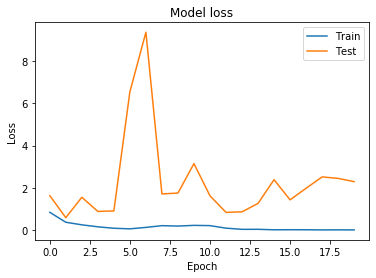

In [23]:
plt.plot(history[0].history['loss'])
plt.plot(history[0].history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()